# Tme series analysis on US temperature anomaly

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import precision_score ,recall_score, f1_score
from sklearn.metrics import accuracy_score

In [2]:
from plotly.offline import iplot, init_notebook_mode,download_plotlyjs
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# This will show the plots as image with out the interactive part. github doesn't show javascript images. that is why I used this.
# To see the interactive plots rerun the notebook , comment this code and rerun the notebook.
# The link for the interactive html of the note book is available on the Readme section of my github. 
import plotly.io as pio
pio.renderers.default = "svg"

In [4]:
#use this code to be able to display all the output in the cell instead of only displaying the out put for the last one. see the next cell.
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# Load and clean the data

In [5]:
df_temp = pd.read_csv('global_temp_change.csv')

In [6]:
df_temp.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,°C,0.777,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,°C,0.062,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,°C,2.744,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,°C,-5.232,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,°C,1.868,Fc,Calculated data


In [7]:
#df_temp.Area.unique()

In [8]:
df_temp.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Months Code', 'Months', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [9]:
df_temp.rename(columns={'Value':'temperature'}, inplace =True)

In [10]:
df_temp.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Months Code', 'Months', 'Year Code', 'Year', 'Unit', 'temperature',
       'Flag', 'Flag Description'],
      dtype='object')

We only need the following features from the data. the rest are either constant or irrelevant <br>
[ 'Area Code', 'Area','Months Code', 'Months', 'Year', 'Value']

In [11]:
df_temp = df_temp[[ 'Area Code', 'Area','Months Code', 'Months', 'Year', 'temperature']]
df_temp.head()

,Area Code,Area,Months Code,Months,Year,temperature
0,2,Afghanistan,7001,January,1961,0.777
1,2,Afghanistan,7001,January,1962,0.062
2,2,Afghanistan,7001,January,1963,2.744
3,2,Afghanistan,7001,January,1964,-5.232
4,2,Afghanistan,7001,January,1965,1.868


In [12]:
df_temp.isna().sum()

Area Code         0
Area              0
Months Code       0
Months            0
Year              0
temperature    7685
dtype: int64

In [13]:
df_temp=df_temp.dropna()

In [14]:
#df_temp.Area.unique()

In [15]:
df_temp['pos_temp'] = df_temp.temperature.apply(lambda x: 0 if x < 0  else x)
# disc_data['Discount'] = disc_data['Discount'].apply(lambda x: 0 if (x < = 0)  else x)
df_temp.head()

,Area Code,Area,Months Code,Months,Year,temperature,pos_temp
0,2,Afghanistan,7001,January,1961,0.777,0.777
1,2,Afghanistan,7001,January,1962,0.062,0.062
2,2,Afghanistan,7001,January,1963,2.744,2.744
3,2,Afghanistan,7001,January,1964,-5.232,0.000
4,2,Afghanistan,7001,January,1965,1.868,1.868


In [16]:
df_temp_metro = df_temp.query("Months == 'Meteorological year'") 
df_temp_metro.head()

,Area Code,Area,Months Code,Months,Year,temperature,pos_temp
944,2,Afghanistan,7020,Meteorological year,1961,-0.080,0.000
945,2,Afghanistan,7020,Meteorological year,1962,-0.120,0.000
946,2,Afghanistan,7020,Meteorological year,1963,0.882,0.882
947,2,Afghanistan,7020,Meteorological year,1964,-0.727,0.000
948,2,Afghanistan,7020,Meteorological year,1965,-0.200,0.000


# When did the highest temperature Anomaly happen?

In [17]:
df_temp_top_20 = df_temp_metro.nlargest(20,['temperature'])
df_temp_top_20


,Area Code,Area,Months Code,Months,Year,temperature,pos_temp
193813,260,Svalbard and Jan Mayen Islands,7020,Meteorological year,2016,5.413,5.413
193815,260,Svalbard and Jan Mayen Islands,7020,Meteorological year,2018,4.104,4.104
193803,260,Svalbard and Jan Mayen Islands,7020,Meteorological year,2006,3.886,3.886
193809,260,Svalbard and Jan Mayen Islands,7020,Meteorological year,2012,3.825,3.825
193811,260,Svalbard and Jan Mayen Islands,7020,Meteorological year,2014,3.382,3.382
193814,260,Svalbard and Jan Mayen Islands,7020,Meteorological year,2017,3.347,3.347
193812,260,Svalbard and Jan Mayen Islands,7020,Meteorological year,2015,3.307,3.307
193804,260,Svalbard and Jan Mayen Islands,7020,Meteorological year,2007,3.050,3.050
85024,85,Greenland,7020,Meteorological year,2010,3.042,3.042
34993,33,Canada,7020,Meteorological year,2010,2.917,2.917


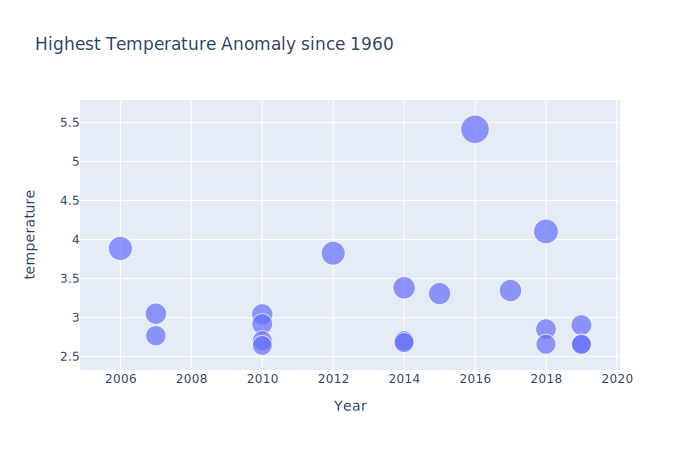

In [18]:
fig = px.scatter(df_temp_top_20, x="Year", y="temperature", size='temperature' ,title='Highest Temperature Anomaly since 1960')
fig.show()

###### The  highest 20 temperature anomaly are after the year 2000. The year 2016 being the highest

# Temperature anomaly animation since 1961

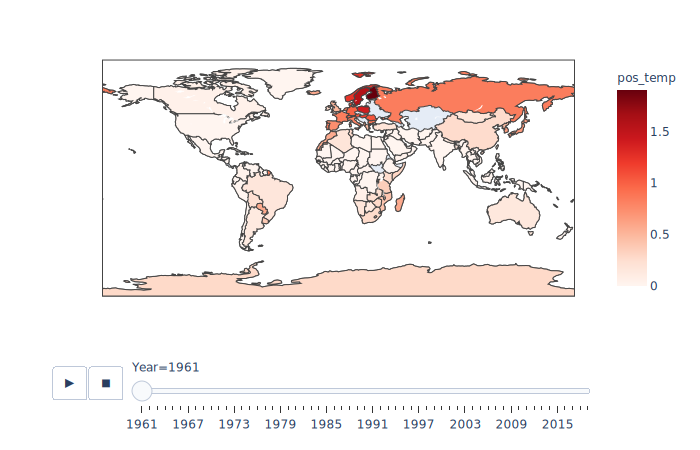

In [19]:
fig =  px.choropleth(df_temp_metro,locations="Area", locationmode="country names",animation_frame="Year", animation_group="Area",
            color="pos_temp",color_continuous_scale= 'reds' , hover_name="Area",)

fig.show()

In [20]:

# data = [ dict(
#         type = 'choropleth',
#         colorscale = 'Rainbow',
#         locations = df_temp['Area'],
#         z = df_temp['pos_temp'],
#         text = df_temp['Area'],
#         colorbar = dict(
#             title = 'Years', 
#             titlefont=dict(size=25),
#             tickfont=dict(size=18))
#       ) ]
# # Define layout
# layout = dict(
#     title = 'Life Expectancy at Birth',
#     titlefont = dict(size=40),
#     geo = dict(
#         showframe = True,
#         showcoastlines = True,
#         projection = dict(type = 'equirectangular')
#               )
#              )
# # Plot
# fig = dict( data=data, layout=layout )
# #plot_url = plotly.offline.plot(fig, validate=False, filename='world.html')
# fig.show()

In [21]:
df_temp_usa = df_temp.query("Area=='United States of America'")

In [22]:
ts_temp = df_temp_usa[['Months','Year','temperature']]
ts_temp.head()

,Months,Year,temperature
212296,January,1961,0.943
212297,January,1962,-0.771
212298,January,1963,-1.170
212299,January,1964,0.901
212300,January,1965,0.747


In [23]:
ts_temp.Months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year'], dtype=object)

In [24]:
# to take only the monthy data excluding the seasonal months
ts_temp_date= ts_temp[ts_temp['Months'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])]

In [25]:
ts_temp_date.Months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [26]:
# change the month names to number
ts_temp_date['Months'] = pd.to_datetime(ts_temp_date.Months, format='%B').dt.month

In [27]:
# To combine the months and year to create a date
ts_temp_date['date'] = pd.to_datetime(ts_temp_date[['Year', 'Months']].assign(DAY=1))


In [28]:
ts_temp_date.head()

,Months,Year,temperature,date
212296,1,1961,0.943,1961-01-01
212297,1,1962,-0.771,1962-01-01
212298,1,1963,-1.170,1963-01-01
212299,1,1964,0.901,1964-01-01
212300,1,1965,0.747,1965-01-01


In [29]:
ts = ts_temp_date[['date', 'temperature']]
ts.set_index('date', inplace =True)

In [30]:
ts.sort_index(inplace =True)

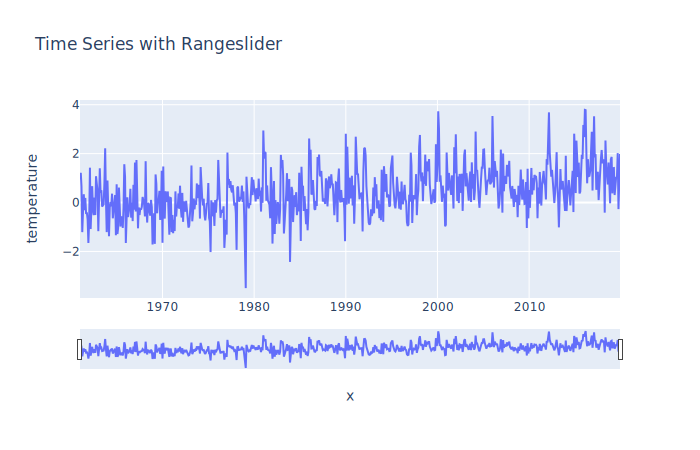

In [31]:
import plotly.graph_objects as go
fig = px.line(ts,x=ts.index, y= ts.temperature, title='Time Series with Rangeslider').update_xaxes(rangeslider_visible=True)
# fig = px.line(ts, x='temperature', title='Time Series with Rangeslider')
fig.show()

In [32]:
ts.head()

,temperature
date,
1961-01-01,0.943
1961-02-01,1.215
1961-03-01,0.656
1961-04-01,-1.210
1961-05-01,-0.348


In [33]:
ts.index

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='date', length=708, freq=None)

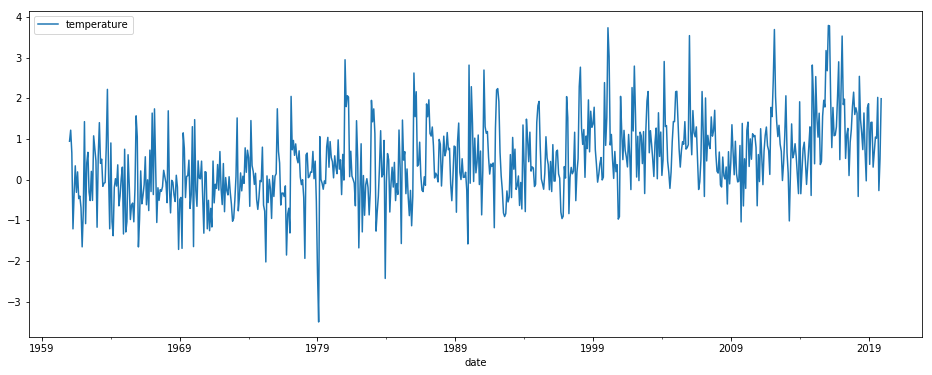

In [34]:
ts.plot(figsize =(16,6));

In [35]:
#ts.plot(figsize = (22,8), style = 'b.')

# Decomposition:seasonal trend and residual patterns

<Figure size 864x576 with 0 Axes>

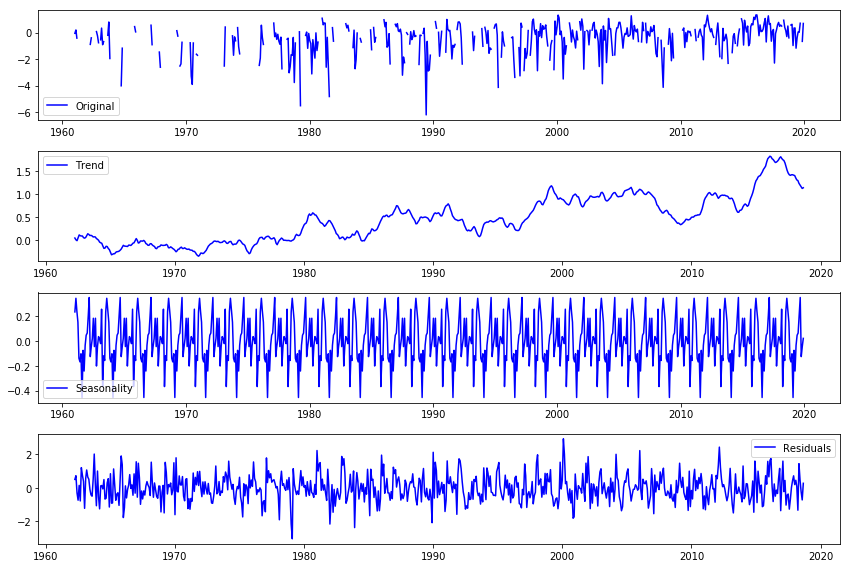

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts ,freq=30)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Stationarity test

In [37]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Ho: The data is not stationary' '\n' 'H1: The data is Stationary' '\n\n')
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts['temperature'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
if dfoutput['p-value'] < 0.05 :
    print('p Value less than 0.05, we reject the null hypothesis and the data is Stationary' )
else:
    print('p Value greater than 0.05, we fail to reject the null hypothesis and the data is not Stationary' )
    

Ho: The data is not stationary
H1: The data is Stationary


Results of Dickey-Fuller Test:
Test Statistic                  -3.563213
p-value                          0.006505
#Lags Used                      11.000000
Number of Observations Used    696.000000
Critical Value (1%)             -3.439780
Critical Value (5%)             -2.865702
Critical Value (10%)            -2.568986
dtype: float64
p Value less than 0.05, we reject the null hypothesis and the data is Stationary


# Auto correlation and partial auto correlation plots

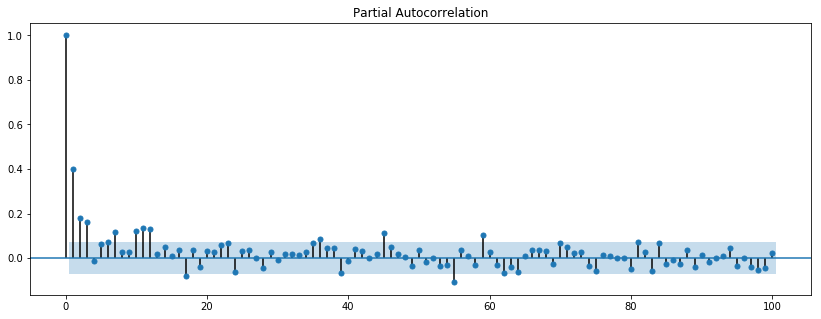

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(ts, lags = 100);


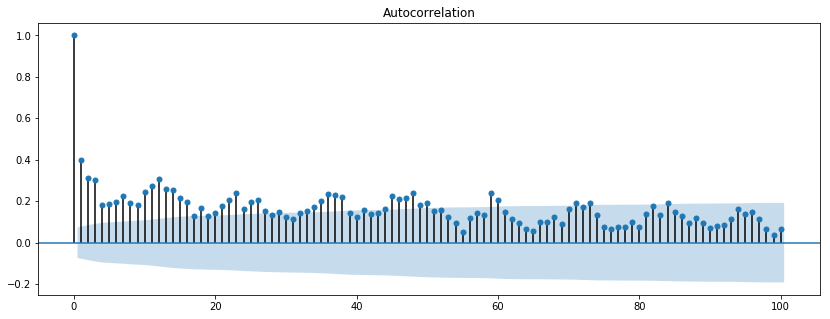

In [39]:
plot_acf(ts, lags = 100);


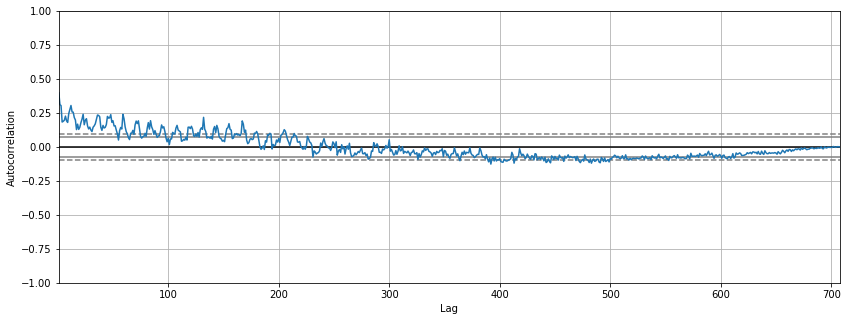

In [40]:
pd.plotting.autocorrelation_plot(ts)

In [41]:
ts.shape

(708, 1)

,temperature
date,
1961-01-01,0.943
1961-02-01,1.215
1961-03-01,0.656
1961-04-01,-1.210
1961-05-01,-0.348


,temperature
date,
2001-01-01,2.046
2001-02-01,1.181
2001-03-01,0.491
2001-04-01,1.210
2001-05-01,0.721


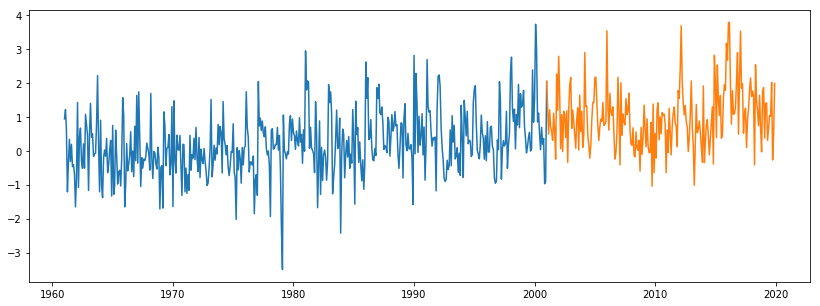

In [42]:
#divide into train and validation set
train = ts[:'2001-01-01']
test = ts['2001-01-01':]
#plotting the data
train.head()
test.head()
plt.plot(train)
plt.plot(test)


# The Auto ARIMA Model

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1226.540, BIC=1251.583, Fit time=0.560 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1444.848, BIC=1453.196, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1354.130, BIC=1366.652, Fit time=0.076 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1247.321, BIC=1259.842, Fit time=0.297 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1223.141, BIC=1244.010, Fit time=0.703 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1223.005, BIC=1239.700, Fit time=0.482 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1223.400, BIC=1244.269, Fit time=0.724 seconds
Total fit time: 2.865 seconds


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args=None,
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  481
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -607.503
Date:                Sun, 26 Apr 2020   AIC                           1223.005
Time:                        17:06:53   BIC                           1239.700
Sample:                             0   HQIC                          1229.568
                                - 481                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0015      0.000      4.780      0.000       0.001       0.002
ar.L1          0.2322      0.038      6.049      0.000       0.157       0.307
ma.L1         -0.9999      0.954     -1.049      0.2

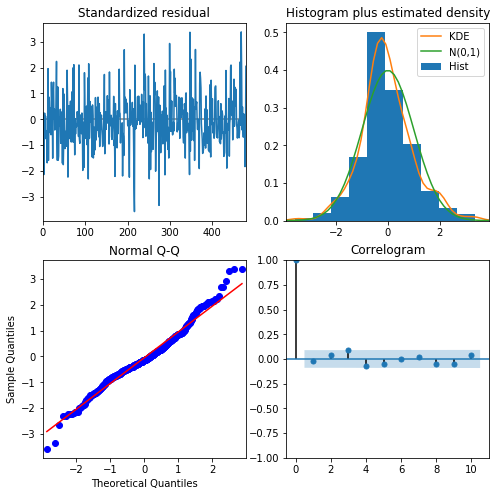

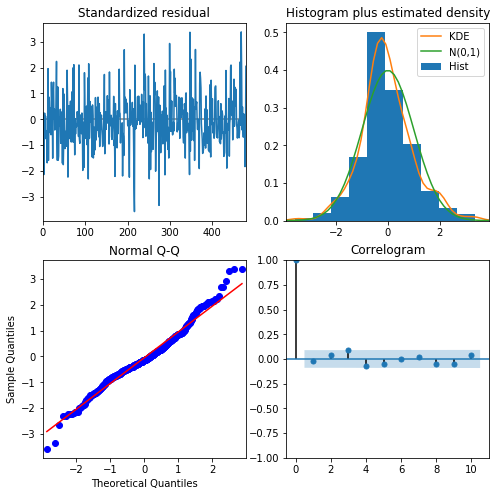

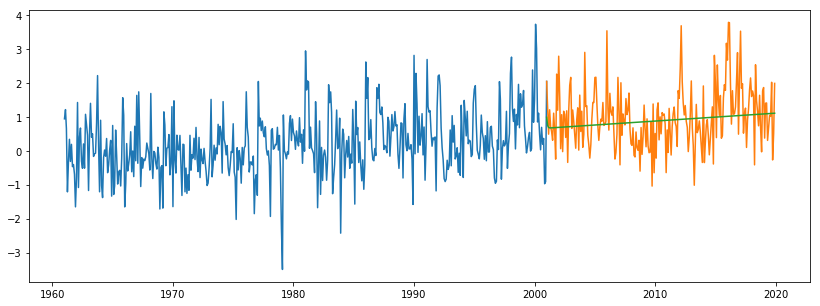

,temperature,predicted_value
date,,
2001-01-01,2.046,0.988162
2001-02-01,1.181,0.743978
2001-03-01,0.491,0.688760
2001-04-01,1.210,0.677427
2001-05-01,0.721,0.676287


The  mean squared error is: 0.7540210600135007


In [43]:
import pmdarima as pm
model = pm.auto_arima(train, trace=True,error_action='ignore', suppress_warnings=True)
model.fit(train)

print(model.summary())
model.plot_diagnostics(figsize=(8, 8))
plt.show()
forecast1 = model.predict(n_periods=len(test))
forecast1 = pd.DataFrame(forecast1,index = test.index,columns=['Prediction'])

#plot the predictions for test set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast1, label='Prediction')
plt.show();

test['predicted_value']=forecast1
test.head()

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test.temperature, test.predicted_value)
print ('The  mean squared error is: {}'.format(MSE))

# The Facebook Prophet model

In [44]:
ts.head()

,temperature
date,
1961-01-01,0.943
1961-02-01,1.215
1961-03-01,0.656
1961-04-01,-1.210
1961-05-01,-0.348


In [45]:
ts_prof = ts.reset_index()
ts_prof.head()

,date,temperature
0,1961-01-01,0.943
1,1961-02-01,1.215
2,1961-03-01,0.656
3,1961-04-01,-1.210
4,1961-05-01,-0.348


In [46]:
ts_prof = ts_prof.rename(columns={'date':'ds','temperature': 'y'})
ts_prof.head()



,ds,y
0,1961-01-01,0.943
1,1961-02-01,1.215
2,1961-03-01,0.656
3,1961-04-01,-1.210
4,1961-05-01,-0.348


Text(0, 0.5, 'Monthly Temperature Anomality ')

Text(0.5, 0, 'Date')

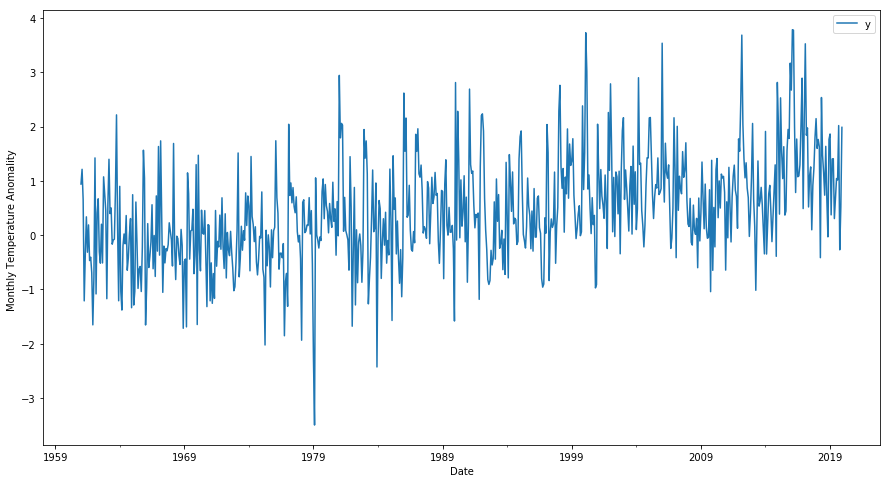

In [47]:
ax = ts_prof.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Monthly Temperature Anomality ')
ax.set_xlabel('Date')

plt.show()


In [48]:
from fbprophet import Prophet as proph
Model = proph(interval_width=0.95)
Model.fit(ts_prof)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future_dates = Model.make_future_dataframe(periods=120, freq='MS')

In [50]:
future_dates.tail()

,ds
823,2029-08-01
824,2029-09-01
825,2029-10-01
826,2029-11-01
827,2029-12-01


In [51]:
forecast = Model.predict(future_dates)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1961-01-01,-0.302632,-1.579608,1.747568,-0.302632,-0.302632,0.384408,0.384408,0.384408,0.384408,0.384408,0.384408,0.0,0.0,0.0,0.081775
1,1961-02-01,-0.300469,-1.672985,1.650218,-0.300469,-0.300469,0.208026,0.208026,0.208026,0.208026,0.208026,0.208026,0.0,0.0,0.0,-0.092442
2,1961-03-01,-0.298515,-1.395333,1.988723,-0.298515,-0.298515,0.565859,0.565859,0.565859,0.565859,0.565859,0.565859,0.0,0.0,0.0,0.267345
3,1961-04-01,-0.296351,-2.013171,1.326793,-0.296351,-0.296351,-0.028177,-0.028177,-0.028177,-0.028177,-0.028177,-0.028177,0.0,0.0,0.0,-0.324528
4,1961-05-01,-0.294257,-2.031633,1.332294,-0.294257,-0.294257,-0.105686,-0.105686,-0.105686,-0.105686,-0.105686,-0.105686,0.0,0.0,0.0,-0.399943


In [52]:
ts_prof_forcast= forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
ts_prof_forcast.head()

,ds,yhat,yhat_lower,yhat_upper
0,1961-01-01,0.081775,-1.579608,1.747568
1,1961-02-01,-0.092442,-1.672985,1.650218
2,1961-03-01,0.267345,-1.395333,1.988723
3,1961-04-01,-0.324528,-2.013171,1.326793
4,1961-05-01,-0.399943,-2.031633,1.332294


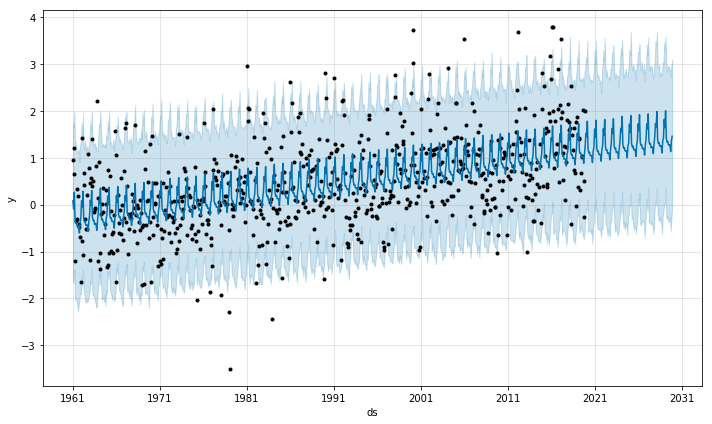

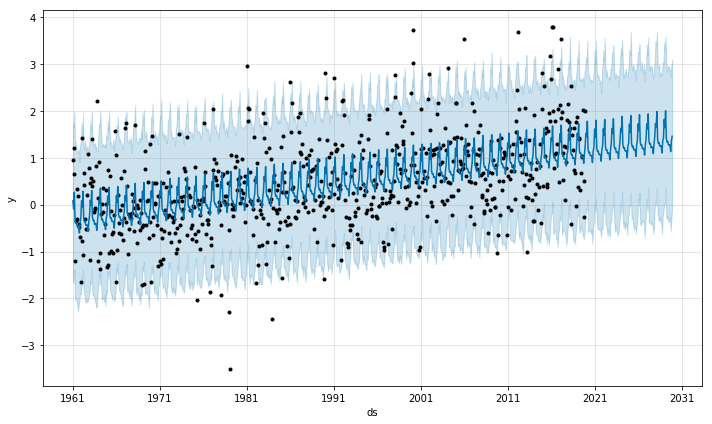

In [53]:
Model.plot(forecast, uncertainty=True)


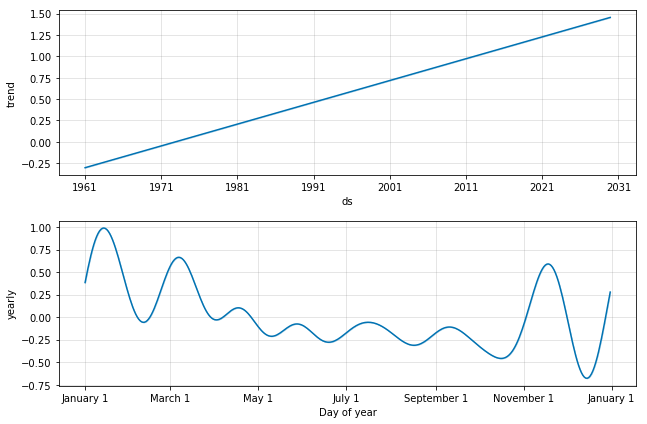

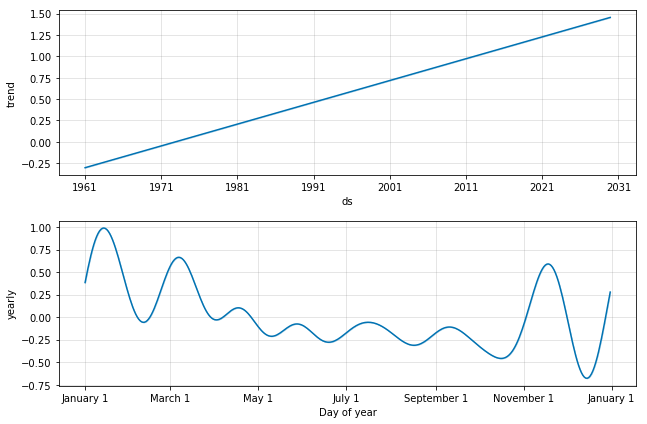

In [54]:
Model.plot_components(forecast)
plt.show()


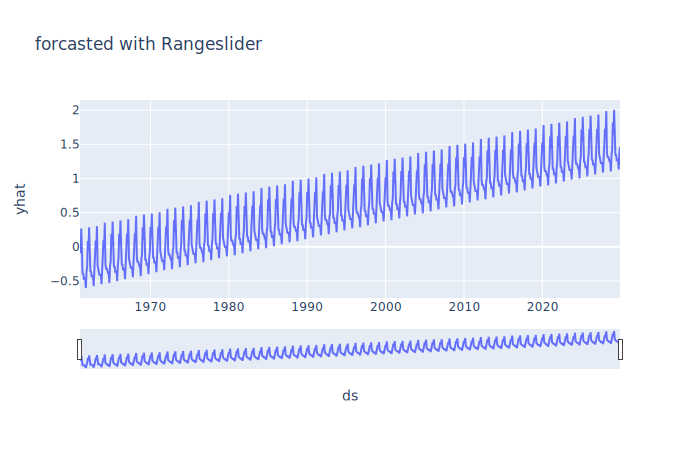

In [55]:
import plotly.graph_objects as go
fig = px.line(ts_prof_forcast,x='ds', y= 'yhat', title='forcasted with Rangeslider').update_xaxes(rangeslider_visible=True)
# fig = px.line(ts, x='temperature', title='Time Series with Rangeslider')
fig.show()

In [56]:
ts_prof.head()

,ds,y
0,1961-01-01,0.943
1,1961-02-01,1.215
2,1961-03-01,0.656
3,1961-04-01,-1.210
4,1961-05-01,-0.348


In [57]:
ts_prof_forcast.head()

,ds,yhat,yhat_lower,yhat_upper
0,1961-01-01,0.081775,-1.579608,1.747568
1,1961-02-01,-0.092442,-1.672985,1.650218
2,1961-03-01,0.267345,-1.395333,1.988723
3,1961-04-01,-0.324528,-2.013171,1.326793
4,1961-05-01,-0.399943,-2.031633,1.332294


In [58]:
metric_df = ts_prof_forcast.set_index('ds')[['yhat']].join(ts_prof.set_index('ds')[['y']]).reset_index()
metric_df.head()

,ds,yhat,y
0,1961-01-01,0.081775,0.943
1,1961-02-01,-0.092442,1.215
2,1961-03-01,0.267345,0.656
3,1961-04-01,-0.324528,-1.210
4,1961-05-01,-0.399943,-0.348


The last part of the dataframe has “NaN” for ‘y' that is because we don't have the future true values and we can drop these “NaN” values.

In [59]:
metric_df.dropna(inplace=True)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [61]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.6985105677557811

In [62]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.635076461710698

###### Conclusion : The mean squared error for the facebook prophet(0.64) model is lower than the auto arima model so I prefer to use that. the forecast shows that the temperature will keep rising above the 1 degree Celsius. This forecast doesn't put the lag effect of co2 emission into consideration. 